In [50]:

import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
%matplotlib inline
component = 901
real_pvalues = np.array(pickle.load(open('../data/processed/associations/covering_data_mean_pvalues/{}_pvalues_shuffle0_filterlimit0.py'.format(component),'rb'))[1])
shuffled_data = pickle.load(open('../data/processed/associations/covering_data_mean_pvalues/{}_pvalues_shuffle1_filterlimit0.py'.format(component),'rb'))
shuffled_idx = np.array(shuffled_data[0])
shuffled_pvalues = np.array(shuffled_data[1])
[X_matrix, y_pheno] = pickle.load(open('../data/processed/associations/covering_data_mean.py','rb'))



In [35]:
sorted_pvalues_idx = np.argsort(real_pvalues)
print (sorted_pvalues_idx[0:10])

[20370 14262 21112 10766  7491 11774 15212 14553 22512   943]


In [55]:
lung_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format("Lung")
with open(lung_expression_filepath, 'r') as f:
    expression_table = np.array([x.split('\t') for x in f.read().splitlines()])

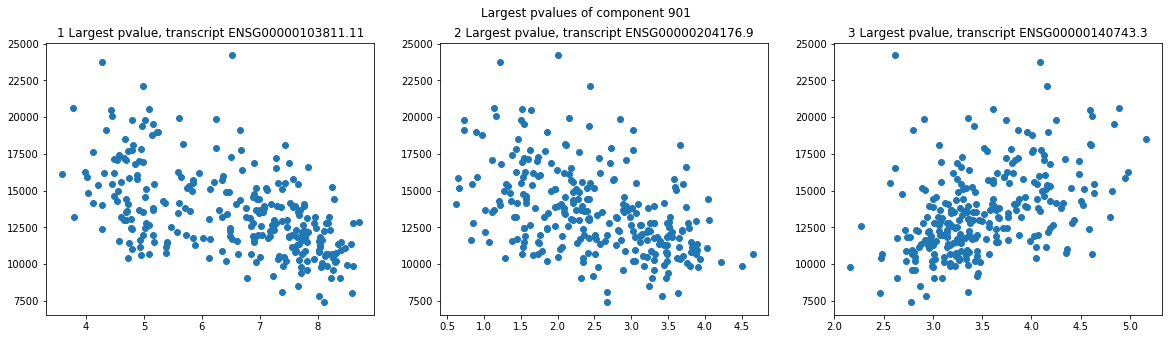

In [56]:
f,a = plt.subplots(1,3, figsize=(20,5))
f.suptitle("Largest pvalues of component {}".format(component))
titles = []
for i in range(3):
    a[i].scatter(X_matrix[:,sorted_pvalues_idx[i]], y_pheno[:,901])
    a[i].set_title("{} Largest pvalue, transcript {}".format(i+1, expression_table[1:,0][sorted_pvalues_idx[i]]))

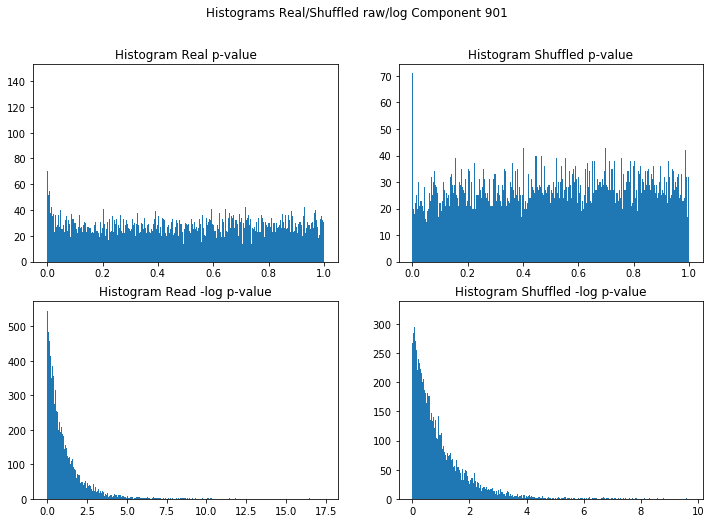

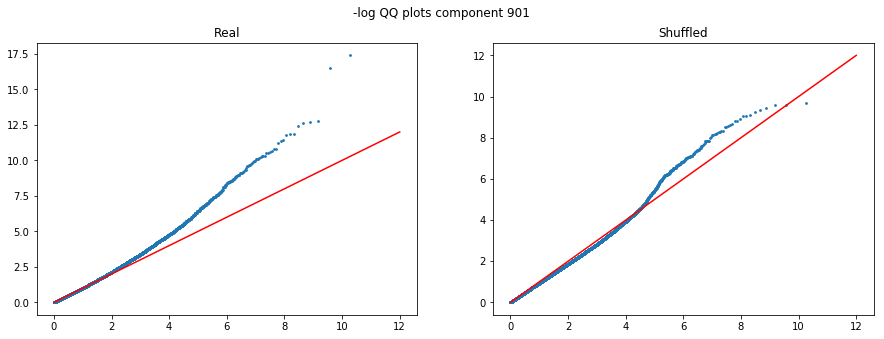

In [53]:
f,a = plt.subplots(2,2, figsize=(12,8))
f.suptitle("Histograms Real/Shuffled raw/log Component {}".format(component))
a[0][0].set_title("Histogram Real p-value")
a[0][0].hist([x for x in real_pvalues],bins=1000)
a[0][1].set_title("Histogram Shuffled p-value")
a[0][1].hist([x for x in shuffled_pvalues],bins=1000)
a[1][0].set_title("Histogram Read -log p-value")
a[1][0].hist([-math.log(x) for x in real_pvalues],bins=1000)
a[1][1].set_title("Histogram Shuffled -log p-value")
a[1][1].hist([-math.log(x) for x in shuffled_pvalues],bins=1000)
plt.show()

sorted_real_indexes = np.argsort(real_pvalues)
sorted_real_pvalues = real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(shuffled_pvalues)
sorted_shuffled_pvalues = shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

f,a = plt.subplots(1,2, figsize=(15,5))
f.suptitle('-log QQ plots component {}'.format(component))
a[0].scatter([-math.log(x) for x in expected_real], [-math.log(x) for x in sample_real], s=3)
a[0].plot(np.linspace(0,12,100), np.linspace(0,12,100),c='red')
a[0].set_title('Real')
a[1].scatter([-math.log(x) for x in expected_shuffle], [-math.log(x) for x in sample_shuffle], s=3)
a[1].plot(np.linspace(0,12,100), np.linspace(0,12,100),c='red')
a[1].set_title('Shuffled')
